# Business Case: Pinky Churn Rate

"Pinky dispose d'une plateforme d'appel, avec des conseillers. Les conseillers peuvent appeler les clients pour leur faire des propositions commerciales. Pinky a remarqué qu'il est presqu'impossible de faire revenir un client qui a résilié. Il préfère donc faire des propositions commerciales aux clients "à risque", avant qu'ils ne résilient.

C'est pourquoi Pinky fait appel à toi ! Pinky te fournit une extraction d'un échantillon représentatif de sa base client, dont des clients qui ont résilié ce mois-ci. Ton but va être de décrire les caractéristiques des clients ayant résilié et ce qui les distingue des autres clients. Puis tu devras proposer un scoring pour chaque client, afin de prioriser les appels vers les clients les plus à risque."

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
pinkyData = pd.read_csv(r"C:\Users\sophi\FrMarques\LyonData WCS new\Exercicios\BCase_PinkyTeleCom\Original CSV\churn_telecom.csv")

* There's 7043 lignes/clients and 21 columns;
* Only 3 columns are numeric;
* Apparently, there's no empty values;
* Bolean values:
    - Gender: "Male" or "Female": (3555/3488);
    - SeniorCitizen: 0 and 1 (5901/1142);
    - Partner: "yes" or "no"(3402/3641);
    - Dependents; "yes" or "no" (2110/4933);
    - 

### Spliting churned clients from the ones staying

In [3]:
pinkyData_churned = pinkyData[pinkyData["Churn"] == "Yes"]
pinkyData_clients = pinkyData[pinkyData["Churn"] == "No"]
display(pinkyData_churned.shape)
display(pinkyData_clients.shape)

(2219, 21)

(4824, 21)

### The Churn Rate 

In [4]:
# The churn_rate:
total_clients = pinkyData.shape[0]
churned_clients = pinkyData[pinkyData["Churn"] == "Yes"].shape[0]

pinkyChurn_rate = (churned_clients / total_clients) *100

print(f"The Pinky churn_rate is {pinkyChurn_rate: .2f} %")

The Pinky churn_rate is  31.51 %


In [6]:
pinkyData.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
print(pinkyData["InternetService"].value_counts())
print(pinkyData["PhoneService"].value_counts())

InternetService
Fiber optic    3596
DSL            1921
No             1526
Name: count, dtype: int64
PhoneService
Yes    6361
No      682
Name: count, dtype: int64


In [14]:
pinkyData.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## DataViz
### Tenure by Churn or Not Churn

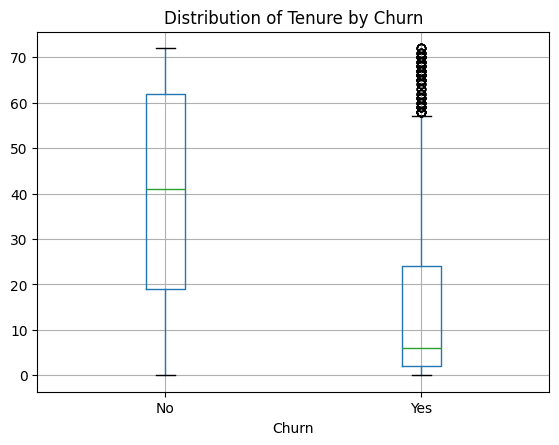

In [31]:
# Comparing "tenure" between clients who left and the ones who stay under contract:
pinkyData.boxplot(column='tenure', by='Churn')
plt.title('Distribution of Tenure by Churn')
plt.suptitle('')
plt.show()

* We can observe that the majority of people that left did it before 10 months under contract but also we notice some "outliers" thet left afer reaching almost 5 years with Pinky services;
* Almost 75% of churned clients left before 24 months/ 2 years which might be linked to the end of contracts and the traditional financial benefits of changing operators;

* More than about a third of the clients still under contract have it for more than 2 and half years and a bit of more than25% for more than 60 monyths/5 years; 

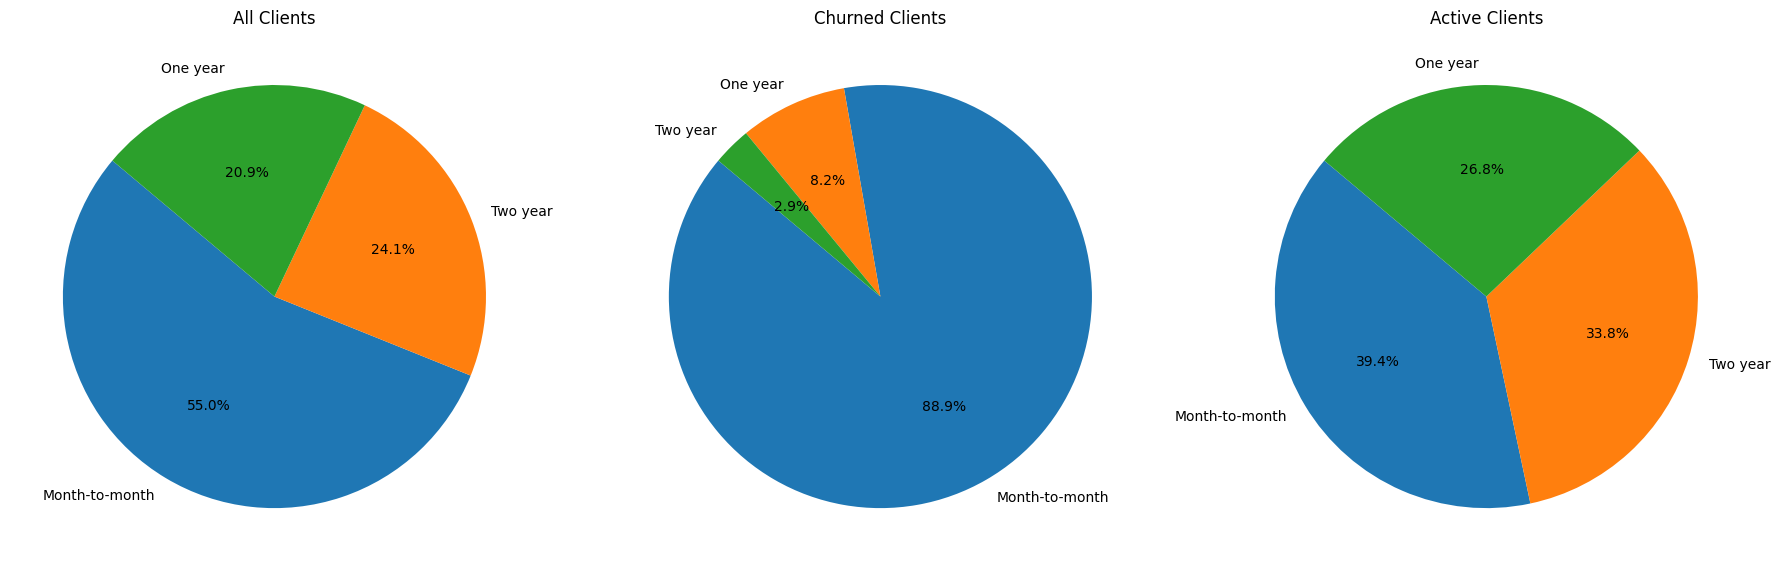

In [32]:
########### Watching the type of contracts overall and comparing churned with active clients:
contracts_total = pinkyData["Contract"].value_counts()
contracts_churned = pinkyData_churned["Contract"].value_counts()
contracts_active = pinkyData_clients["Contract"].value_counts()

########## Cooking 3 pies:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

titles = ["All Clients", "Churned Clients", "Active Clients"]
data = [contracts_total, contracts_churned, contracts_active]

for ax, title, contract_data in zip(axes, titles, data):
    ax.pie(contract_data, labels=contract_data.index, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)

plt.tight_layout()
plt.show()

* Most of the contracts of this total of 7043 clients wer* Most of the contracts of the 7043 clients were in a Month-to-Month basis; 
* This dominant type of contract was used for almost 90% of the churned clients, maybe because it seems the most easy to end;
* For the active clients, Month-to-Month is also the prefered type of contract but the proportion is more balanced with on or two years contracts.

+ As conclusion, we can notice that Month-to-Month contracts might not be the more beneficial to Pinky Telecom and we can recomend offering some benefits for longer types of contracts as a way to reduce the churn rate.   e in a Month-to-Month basis which are easy to end;

### Multiple plots to compare the varios features with the churn/no churn

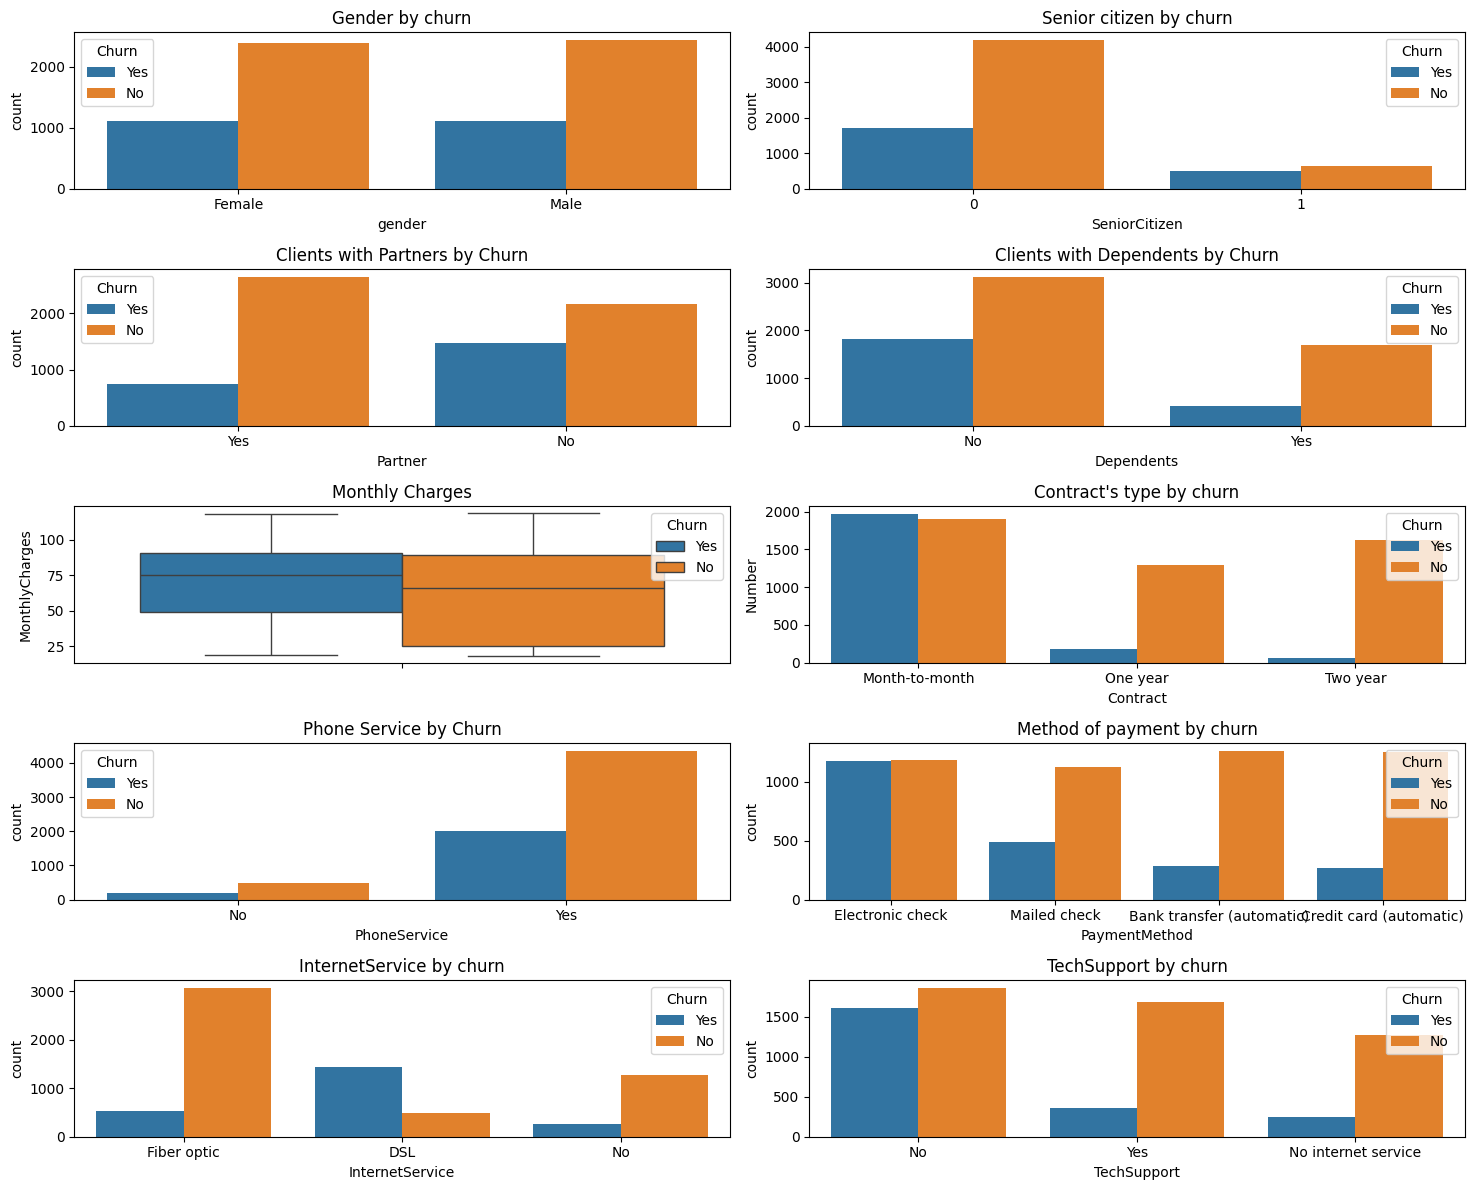

In [33]:
fig, axs = plt.subplots(5, 2, figsize=(15, 12))

sns.countplot(x="gender", data=pinkyData , hue="Churn", ax=axs[0, 0])
axs[0, 0].set_title("Gender by churn")

sns.countplot(x="SeniorCitizen", data=pinkyData , hue="Churn", ax=axs[0, 1])
axs[0, 1].set_title("Senior citizen by churn")

sns.countplot(x="Partner", data=pinkyData , hue="Churn", ax=axs[1, 0])
axs[1,0].set_title("Clients with Partners by Churn")

sns.countplot(x="Dependents", data=pinkyData , hue="Churn", ax=axs[1, 1])
axs[1,1].set_title("Clients with Dependents by Churn")

sns.boxplot(data=pinkyData, y='MonthlyCharges', hue='Churn',ax=axs[2, 0])
axs[2, 0].set_title('Monthly Charges')

sns.countplot(x="Contract", data=pinkyData , hue="Churn", ax=axs[2, 1])
axs[2, 1].set_title("Contract's type by churn")
axs[2, 1].set_ylabel('Number')

sns.countplot(x="PhoneService", data=pinkyData, hue="Churn", ax=axs[3, 0])
axs[3,0].set_title("Phone Service by Churn")

sns.countplot(x="PaymentMethod", data=pinkyData , hue="Churn", ax=axs[3, 1])
axs[3, 1].set_title("Method of payment by churn")

sns.countplot(x="InternetService", data=pinkyData , hue="Churn", ax=axs[4, 0])
axs[4, 0].set_title("InternetService by churn")

sns.countplot(x="TechSupport", data=pinkyData , hue="Churn", ax=axs[4, 1])
axs[4, 1].set_title("TechSupport by churn")

# Tightning layout to adjust plots to space:
plt.tight_layout()
plt.show()

* <u>Gender: doesn't seem to have a major impact in the Churn rate;</u>
* SeniorCitizen: Clients under 65 are the vast majority but the seniors (>65 years old) seem to be proportionally more open to leave;
* Clients with "no partner" seems more open to leave which can tell us that having someone to share the bills can benefit longer stays;  
* Clients with dependents (kids for example) are more willing to stay that the clients with no dependents;
* The "MonthlyCharges" between 50 and around 80 euros seems to have a huge impact in half of the churn;
* Clients on monthly "contracts" are a lot more open to "churn" than with other type of contracts;
* Almost all the clients have "PhoneService" and this have a significant impact in the churn rate;
* Electronic payments are linked to higher "churn" rates while "automatic" payments, problaly linked to longer contracts, have a lower quiting rate; 
* Clients with "InternetService" with "ADSL" are a lot more willingly to "churn" while the "fiber" clients seem more satisfied;
* Internet clients with "no tech support" seems more willingly to quit which might signal the lack of extra services as a churn motif. 

# Preparing for Machine Learning to predict Churn risk

### Turning binary features into numeric (1 and 0)

In [23]:
# Dictionary to map "yes" for 1 and "No" for 0:
binary_map = {'Yes': 1, 'No': 0}

# List of binary columns
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']

# Apply conversion to all the columns in one hit:
for col in binary_cols:
    pinkyData[col] = pinkyData[col].map(binary_map).astype(int)

### One-Hot Encoding for categorical features

In [24]:
# Apply One-Hot Encoding for the main categorical features:
pinkyData = pd.get_dummies(pinkyData, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)
# "Drop firts true" means that if the first "True"== 1 value is found the others == 0;

# Apply One-Hot Encoding for aditional internet services (that includes "No internet service"):
internet_service_cols = ['MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                         'TechSupport', 'StreamingTV', 'StreamingMovies']

pinkyData = pd.get_dummies(pinkyData, columns=internet_service_cols, drop_first=True)


In [25]:
# Setting 'customerID' as index:
pinkyData.set_index('customerID', inplace=True)

### Saving a CSV to be used in a parallel exercise with 2 groups: Exclusive Phone clients and Internet clients 

In [26]:
pinkyData.to_csv("pinkyData_2groups.csv")

# Machine Learning
### Training the models

In [53]:
# Setting Features (X) and Target (y):
X = pinkyData.drop(columns=['Churn', 'gender', 'TotalCharges'])  # Removes target and unnecessary features;
y = pinkyData['Churn']  # Just the target;

In [28]:
print(X.dtypes.value_counts()) # checking if only numerical features in X;

bool       21
int64       6
float64     1
Name: count, dtype: int64


### Split train (X) and test (y) teams

In [29]:
# Spliting data in train ((80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)
# "stratify=y": keeps the same proportion of churn and not churn in both "teams".

In [30]:
# Checking proportion of elements in each "team" to balance train and test:
print("Distribution in Train team:")
print(y_train.value_counts(normalize=True))

print("\nDistribution in Test team:")
print(y_test.value_counts(normalize=True))

Distribution in Train team:
Churn
0    0.684949
1    0.315051
Name: proportion, dtype: float64

Distribution in Test team:
Churn
0    0.684883
1    0.315117
Name: proportion, dtype: float64


### Time for Models

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

* Logistic Regression

In [32]:
# Generate and training model:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


* Checking accuracy of the model

In [33]:
# Performing metrics:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8637331440738112

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90       965
           1       0.84      0.70      0.76       444

    accuracy                           0.86      1409
   macro avg       0.86      0.82      0.83      1409
weighted avg       0.86      0.86      0.86      1409



### Confusion Matrix

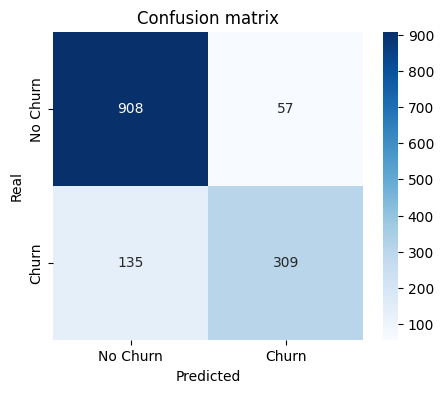

In [34]:
# Generate a confusion matrix:
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualise confusion matrix with Seaborn:
plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion matrix')
plt.show()


* The Logistic Regression model correctly classified 908 "no churn" and 309 "churn" but failed in 135 that effectively didn't left and with 57 that in reality left. Going for better!

### Random forest

Accuracy: 0.865152590489709

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90       965
           1       0.82      0.73      0.77       444

    accuracy                           0.87      1409
   macro avg       0.85      0.83      0.84      1409
weighted avg       0.86      0.87      0.86      1409



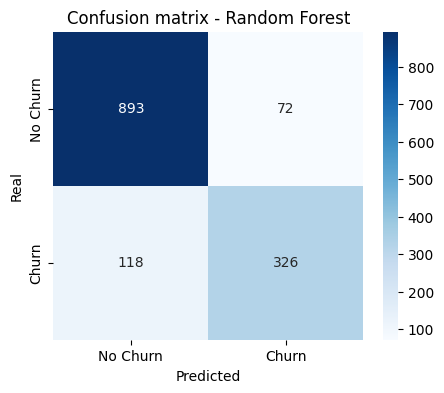

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Build a Random Forest model
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Generates and visualize the confusion matrix:
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion matrix - Random Forest')
plt.show()

* The Random Forest model shows improvement in classifying "no churn" clients but lost a bit of precision. There's still 118 clients predicted as "no churn" but that actually are still under contract;

### XGBoost

Accuracy: 0.8821859474804826

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       965
           1       0.83      0.78      0.81       444

    accuracy                           0.88      1409
   macro avg       0.87      0.86      0.86      1409
weighted avg       0.88      0.88      0.88      1409



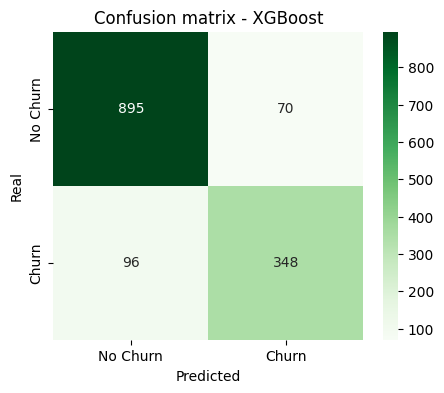

In [36]:
from xgboost import XGBClassifier

# Setting up XGBoost model:
xgb_model = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

# Train the model:
xgb_model.fit(X_train, y_train)

# Predictions:
y_pred_xgb = xgb_model.predict(X_test)

# Model evaluation:
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

# Confusion matrix:
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion matrix - XGBoost')
plt.show()


* The XGBoost model shows better results in predicting "no churn" clients and similiar precision in "churn" than previous models. Overall seems to be the best model but with space to improve with the help of a grid search.

### Grid search

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best hiperparameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}

XGBoost Otimized - Accuracy: 0.8836053938963804

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92       965
           1       0.84      0.78      0.81       444

    accuracy                           0.88      1409
   macro avg       0.87      0.86      0.86      1409
weighted avg       0.88      0.88      0.88      1409



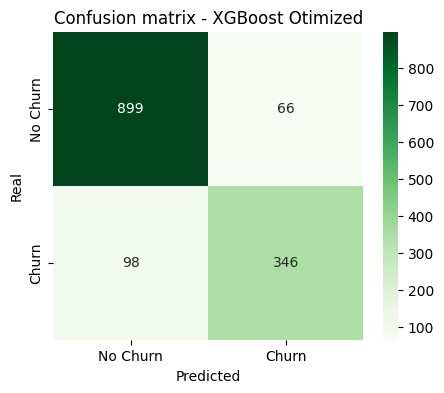

In [37]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

# Setting the grid of hiperparameters for optimization:
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees;
    'learning_rate': [0.01, 0.1, 0.2],  # Learning rate;
    'max_depth': [3, 5, 7],  # Trees depth;
    'subsample': [0.8, 1.0],  # Rate of used samples;
    'colsample_bytree': [0.8, 1.0]  # Rate of used features.
}

# Build the model:
xgb = XGBClassifier(random_state=42)

# Set the GridsearchCV:
grid_search = GridSearchCV(xgb, param_grid, cv=3, scoring='f1', n_jobs=-1, verbose=2)

# Training the model:
grid_search.fit(X_train, y_train)

# Best hiperarameters group:
print("Best hiperparameters:", grid_search.best_params_)

# Best model evaluation:
best_xgb = grid_search.best_estimator_
y_pred_best_xgb = best_xgb.predict(X_test)

print("\nXGBoost Otimized - Accuracy:", accuracy_score(y_test, y_pred_best_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_xgb))

# Confusion matrix:
conf_matrix_best_xgb = confusion_matrix(y_test, y_pred_best_xgb)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_best_xgb, annot=True, fmt='d', cmap='Greens', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion matrix - XGBoost Otimized')
plt.show()


### XGBoost adjusted

XGBoost Adjusted - Accuracy: 0.8800567778566359

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91       965
           1       0.80      0.83      0.81       444

    accuracy                           0.88      1409
   macro avg       0.86      0.87      0.86      1409
weighted avg       0.88      0.88      0.88      1409



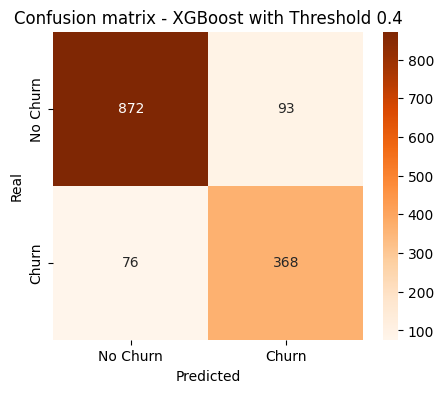

In [38]:
import numpy as np
from sklearn.metrics import precision_recall_curve

# Getting chun probabilities from the otimized model:
y_probs = best_xgb.predict_proba(X_test)[:,1]

# Setting a new threshold under the default of 0.5:
threshold = 0.4

# Applying the new rule:
y_pred_threshold = np.where(y_probs > threshold, 1, 0)

# Adjuste model evalutaion:
print("XGBoost Adjusted - Accuracy:", accuracy_score(y_test, y_pred_threshold))
print("\nClassification Report:\n", classification_report(y_test, y_pred_threshold))

# New confusion matrix:
conf_matrix_threshold = confusion_matrix(y_test, y_pred_threshold)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_threshold, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title(f'Confusion matrix - XGBoost with Threshold {threshold}')
plt.show()

* After reducing the threshold from 0.5 to 0.4 the prediction improved for "no churn" but reduced for "churn": there's more fake positives (93).

### Measuring features pertinence

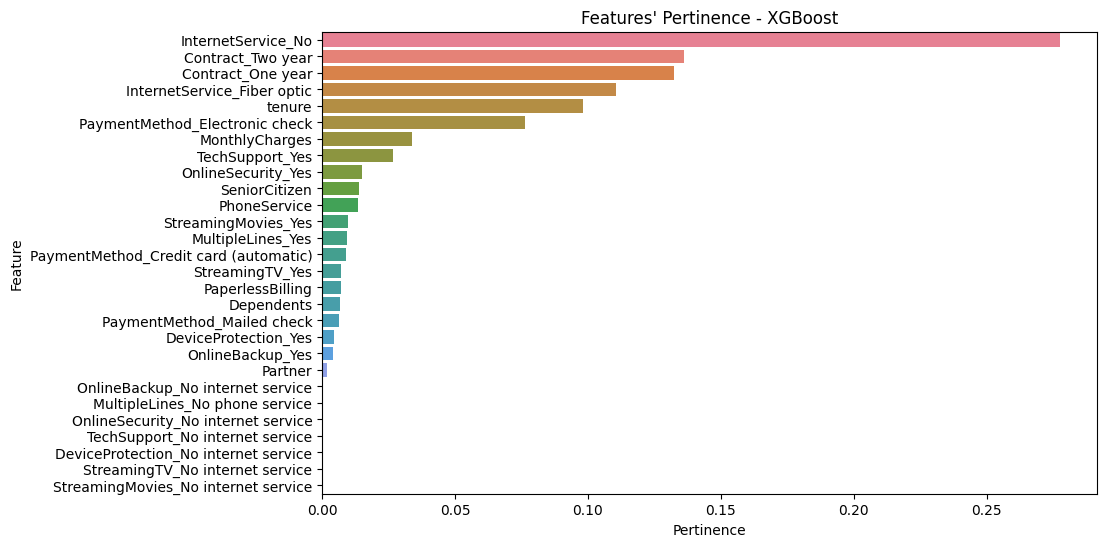

In [39]:
# Getting the features' pertinence with the Xgboost model:
feature_importance = best_xgb.feature_importances_

# set a dataframe to organize results:
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort by pertinence:
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Show main fatures
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df, hue="Feature", dodge=False, legend=False)
plt.xlabel('Pertinence')
plt.ylabel('Feature')
plt.title("Features' Pertinence - XGBoost")
plt.show()

In [40]:
# Comparing the churn rate between clients with and without internet service:
print(pinkyData.groupby('InternetService_No')['Churn'].mean())
print()
# Comparing churn by type of contract:
print(pinkyData.groupby(['Contract_Two year', 'Contract_One year'])['Churn'].mean())


InternetService_No
False    0.356534
True     0.165138
Name: Churn, dtype: float64

Contract_Two year  Contract_One year
False              False                0.508903
                   True                 0.123557
True               False                0.038348
Name: Churn, dtype: float64


In [41]:
# Comparing churn rate between clients with or without phone service:
print(pinkyData.groupby('PhoneService')['Churn'].mean())


PhoneService
0    0.304985
1    0.316145
Name: Churn, dtype: float64


In [42]:
pinkyData['Is_Month_to_Month'] = (pinkyData['Contract_Two year'] == 0) & (pinkyData['Contract_One year'] == 0)

# Checking churn rate for Month-to-Month clients:
print(pinkyData.groupby('Is_Month_to_Month')['Churn'].mean())


Is_Month_to_Month
False    0.077967
True     0.508903
Name: Churn, dtype: float64


### Adding contracts "Month-to-Month" as a feature to see if it helps the prediction

In [43]:
# Adding the feature to the "train" and "test" teams:
X_train = X_train.copy()
X_test = X_test.copy()

X_train['Is_Month_to_Month'] = (X_train['Contract_Two year'] == 0) & (X_train['Contract_One year'] == 0)
X_test['Is_Month_to_Month'] = (X_test['Contract_Two year'] == 0) & (X_test['Contract_One year'] == 0)


XGBoost Updated - Accuracy: 0.8899929027679205

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       965
           1       0.86      0.78      0.82       444

    accuracy                           0.89      1409
   macro avg       0.88      0.86      0.87      1409
weighted avg       0.89      0.89      0.89      1409



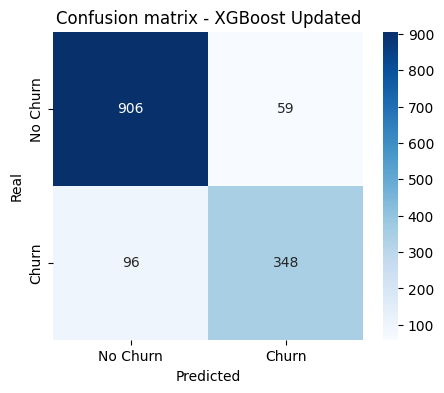

In [44]:
# Setting up and training XGBoost model with the new feature:
xgb_model_updated = XGBClassifier(n_estimators=200, learning_rate=0.1, random_state=42)
xgb_model_updated.fit(X_train, y_train)

# Predictions:
y_pred_xgb_updated = xgb_model_updated.predict(X_test)

# Model evaluation:
print("XGBoost Updated - Accuracy:", accuracy_score(y_test, y_pred_xgb_updated))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb_updated))

# Confusion matrix:
conf_matrix_xgb_updated = confusion_matrix(y_test, y_pred_xgb_updated)

plt.figure(figsize=(5,4))
sns.heatmap(conf_matrix_xgb_updated, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.title('Confusion matrix - XGBoost Updated')
plt.show()


* After adding explicitly a column on monthly contracts the precision of the best model (XGBoost) improved with more than 900 "no churn" well predicted and the lowest "churn" wrongly predicted (56).  

### Remeasuring the importance of features with the new adition 

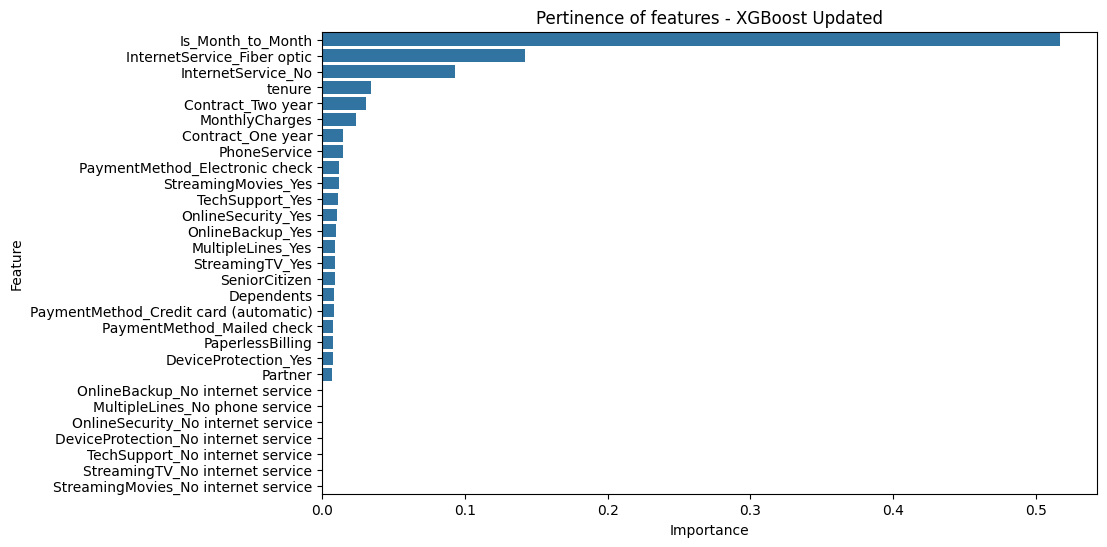

In [45]:
# Updated importance od features in the updated model:
feature_importances_updated = xgb_model_updated.feature_importances_

# Build a dataframe to organize the results:
feature_importance_df_updated = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances_updated})

# Sorting out by pertinence:
feature_importance_df_updated = feature_importance_df_updated.sort_values(by='Importance', ascending=False)

# Show me the features!
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df_updated)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Pertinence of features - XGBoost Updated')
plt.show()


### Comparing churn and no churn clients

In [46]:
# Split clients by churn:
churn_clients = pinkyData[pinkyData['Churn'] == 1]
non_churn_clients = pinkyData[pinkyData['Churn'] == 0]

# Comparing medians of the main numeric features:
churn_summary = churn_clients.describe().T[['mean', 'std']]
non_churn_summary = non_churn_clients.describe().T[['mean', 'std']]

# Building a dataframe to help readability:
comparison_df = pd.concat([churn_summary, non_churn_summary], axis=1)
comparison_df.columns = ['Churn_Mean', 'Churn_Std', 'NonChurn_Mean', 'NonChurn_Std']

comparison_df.head(10)


,Churn_Mean,Churn_Std,NonChurn_Mean,NonChurn_Std
SeniorCitizen,0.229383,0.420531,0.131219,0.337675
Partner,0.337539,0.472977,0.549959,0.497549
Dependents,0.183867,0.387463,0.352819,0.477897
tenure,15.572330,18.780267,40.098466,22.998230
PhoneService,0.906264,0.291527,0.901741,0.297695
PaperlessBilling,0.696260,0.459976,0.544362,0.498080
MonthlyCharges,69.709148,26.971656,62.485904,31.160680
Churn,1.000000,0.000000,0.000000,0.000000


* Looking at this last comparison, we can notice that almost 23% of the "churn" are senior clients which may signal a lack of offers adjusted to an older population;
* Clients with partners are more wingly to stay (55%) and also with dependents (35%) which may show the pertinence of packages for families;
* A massive part of churn (+90%) were phone service clients but also the "no churn" which may show that the internet clients might be more determinant for the churn rate.  

### Correlation matrix

In [58]:
churn_clients.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'InternetService_Fiber optic', 'InternetService_No',
       'Contract_One year', 'Contract_Two year',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Is_Month_to_Month'],
      dtype='object')

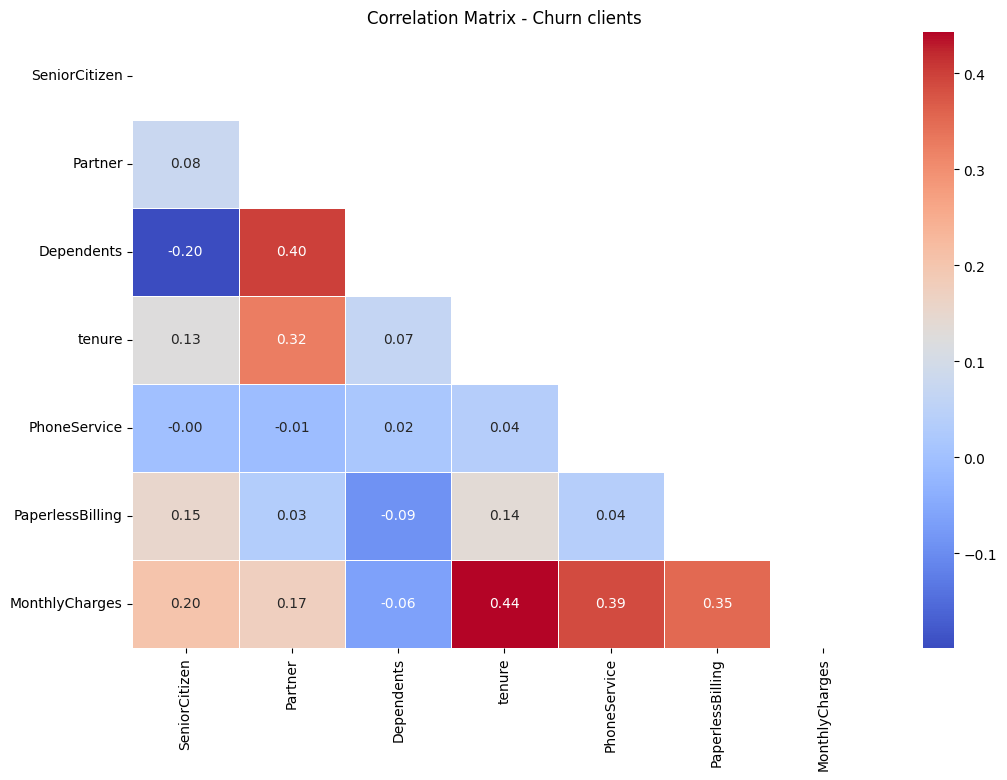

In [47]:
# Filter just churn clients (Churn = 1)
df_churn_only = pinkyData[pinkyData['Churn'] == 1]

# Selecting just numeric columns, ensuring that "object" is a no show:
df_churn_numeric = df_churn_only.select_dtypes(include=['number']).copy()

# Remove the "Churn" column because it's not needed:
df_churn_numeric = df_churn_numeric.drop(columns=['Churn'], errors='ignore')

# Ensuring no NaN values to avoid correlation errors;
df_churn_numeric = df_churn_numeric.dropna()

# Correlation matrix:
correlation_matrix = df_churn_numeric.corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, mask=mask)

plt.title("Correlation Matrix - Churn clients")
plt.show()


## Checking the clients in higher risk of "churn"

In [52]:
# Ensuring all the features used in the training are in the prediction dataframe:

X_for_prediction = X_test.copy()

missing_cols = [col for col in X_train.columns if col not in X_for_prediction.columns]

print("Absent columns in prediction:", missing_cols)

# Adding missing columns with value 0 (if dummies, this avoids errors)
for col in missing_cols:
    X_for_prediction[col] = 0


Absent columns in prediction: []


In [49]:
# Ensuring all the features used in the training are in the prediction dataframe:

X_for_prediction = X.copy()

missing_cols = [col for col in X_train.columns if col not in X_for_prediction.columns]

print("Absent columns in prediction:", missing_cols)

# Adding missing columns with value 0 (if dummies, this avoids errors)
for col in missing_cols:
    X_for_prediction[col] = 0

# Applying XGBoost model for checking churn risk:
pinkyData['Churn_risk'] = xgb_model_updated.predict_proba(X_for_prediction)[:,1]

# Filter active clients (Churn = 0) with a risk of churn higher than 80%:
df_churn_high_risk = pinkyData[(pinkyData["Churn"] == 0) & (pinkyData["Churn_risk"] > 0.8)]

# Sorting by the highst churn risk:
df_risk_clients = df_churn_high_risk[["Churn_risk", "SeniorCitizen", "PhoneService", "tenure", "MonthlyCharges"]].sort_values(by="Churn_risk", ascending=False)

display(df_risk_clients)

Absent columns in prediction: ['Is_Month_to_Month']


,Churn_risk,SeniorCitizen,PhoneService,tenure,MonthlyCharges
customerID,,,,,
6008-NAIXK,0.894206,1,0,54,55.45
7853-WNZSY,0.887664,0,1,1,19.75
7291-CDTMJ,0.882454,0,1,1,19.65
1064-FBXNK,0.875183,0,1,1,19.85
6650-VJONK,0.863629,0,1,1,43.85
3422-GALYP,0.857511,0,1,2,79.45
1465-WCZVT,0.845925,0,1,3,19.65
6124-ACRHJ,0.839251,0,1,1,19.75
3930-ZGWVE,0.839251,0,1,1,19.75


In [50]:
# Applying XGBoost model for checking churn risk:
pinkyData['Churn_risk'] = xgb_model_updated.predict_proba(X_for_prediction)[:,1]


In [51]:
# Filter active clients (Churn = 0) with a risk of churn higher than 80%:
df_churn_high_risk = pinkyData[(pinkyData["Churn"] == 0) & (pinkyData["Churn_risk"] > 0.8)]

# Sorting by the highst churn risk:
df_risk_clients = df_churn_high_risk[["Churn_risk", "SeniorCitizen", "PhoneService", "tenure", "MonthlyCharges"]].sort_values(by="Churn_risk", ascending=False)

display(df_risk_clients)



,Churn_risk,SeniorCitizen,PhoneService,tenure,MonthlyCharges
customerID,,,,,
6008-NAIXK,0.894206,1,0,54,55.45
7853-WNZSY,0.887664,0,1,1,19.75
7291-CDTMJ,0.882454,0,1,1,19.65
1064-FBXNK,0.875183,0,1,1,19.85
6650-VJONK,0.863629,0,1,1,43.85
3422-GALYP,0.857511,0,1,2,79.45
1465-WCZVT,0.845925,0,1,3,19.65
6124-ACRHJ,0.839251,0,1,1,19.75
3930-ZGWVE,0.839251,0,1,1,19.75


* To conclude: there's 14 active clients in high risk (>80%) of ending the contract. They could be prioritized to prevent "Churn"/exit.